## ZRE - Practicals - 1

## EX. 1
Let's record some audio:

    1. Using Audacity (or anything else), record an audio saying two random words any any random way.
        - 16 bitdepth, 32 bitdepth
        - Fs1 = 16 kHz, Fs2 = 8 kHz
    2. Save the audio with Fs = 16 kHz and bit-depth 16 bit as test.wav and as test.l16

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sg
from IPython.display import Audio, display

In [12]:
!gdown -O audio --folder https://drive.google.com/drive/folders/1f7MUZXEbSTekSxJPz8foshYutmBhRT6W
!ls -la audio

Retrieving folder contents
Processing file 1mZp26k48diVMgipA3FxOkuDUSXSAeUjc buongiorno16.wav
Processing file 1l5cq-QW_3B5F4R1c3XgsyBd9pr4fSOaL michiamanomimi8.wav
Processing file 19pUMFP6NtDhqrNSKqCOPWjkzrYYfqnSd michiamanomimi16.wav
Processing file 1EKvrDRq4ItTwvP7N9v4ya_G2GIkQQFHE soprano.wav
Processing file 1pDEEgt4joVKbAWEfY8yc6ir7xx7Sc3gn tancovala8.wav
Processing file 1VQbzwr_CJKbt_E33RVEMGVVMOJtvmgsO test.l16
Processing file 1HySw6Dlal3y8FIq9_4rRzIJTcNCbqAyN test.wav
Processing file 1OrjprjOPC2DqDg4mtx-Khzu5VjNFT2Ku vic8.wav
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1mZp26k48diVMgipA3FxOkuDUSXSAeUjc
To: /home/marek/fit/zre/audio/buongiorno16.wav
100%|██████████████████████████████████████| 84.2k/84.2k [00:00<00:00, 4.08MB/s]
Downloading...
From: https://drive.google.com/uc?id=1l5cq-QW_3B5F4R1c3XgsyBd9pr4fSOaL
To: /home/marek/fit/zre/audio/michiamanomimi8.wav
100%|█

#### Q1 : What's the difference between .wav and .l16? And what about .flac?

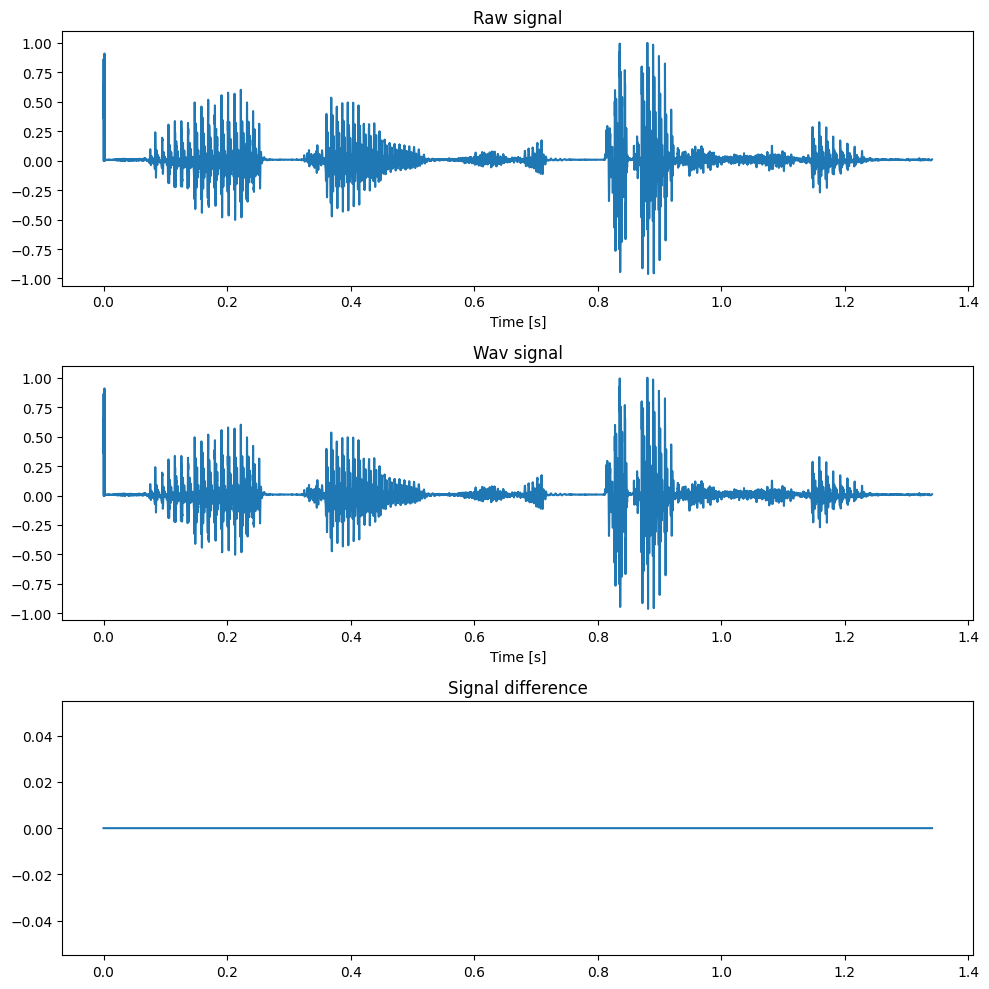

In [13]:
# audio_dir = '/content/audio/' # uncomment this line if you are using Google Colab
audio_dir = './audio/' # uncomment this line if you are using Jupyter Notebook on local machine

sr, Fs_r = sf.read(f'{audio_dir}/test.l16', channels=1, samplerate=8000, format='RAW', subtype='PCM_16')
sw, Fs = sf.read(f'{audio_dir}/test.wav')

xaxis = np.arange(len(sw))/Fs
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].set_title('Raw signal')
ax[0].plot(xaxis,sr)
ax[0].set_xlabel('Time [s]')
ax[1].set_title('Wav signal')
ax[1].plot(xaxis,sw)
ax[1].set_xlabel('Time [s]')
ax[2].set_title('Signal difference')
ax[2].plot(xaxis, sr - sw)
plt.tight_layout()
plt.show()

#### Q2 : How is the same signal at bitdepth 32 bit? What is the bit rate (bit/s)?

In [14]:
bit_rate_16 = Fs * 16
bit_rate_32 = Fs * 32

print(f"Bit rate at {Fs} Hz:")
print(f"16-bit signal: {bit_rate_16} bit/s")
print(f"32-bit signal: {bit_rate_32} bit/s")


Bit rate at 8000 Hz:
16-bit signal: 128000 bit/s
32-bit signal: 256000 bit/s


#### Q3 : What happens, if we record a soprano opera singer at 8 kHz Fs? How will the spectrogram look?

The higher harmonic frequencies (above 4kHz), will create aliasing artifacts (non-harmonic frequencies that were not originally present).

## EX. 2

Let's load the signals here and play with them a little bit...

    1. load the signals (test.wav and test.l16)
    2. compare them
    3. center them
        - using the whole recorded signal
        - ONLINE
    4. compare the calculated means

#### 1-2 Load and compare

#### 3 CENTERING

##### Offline

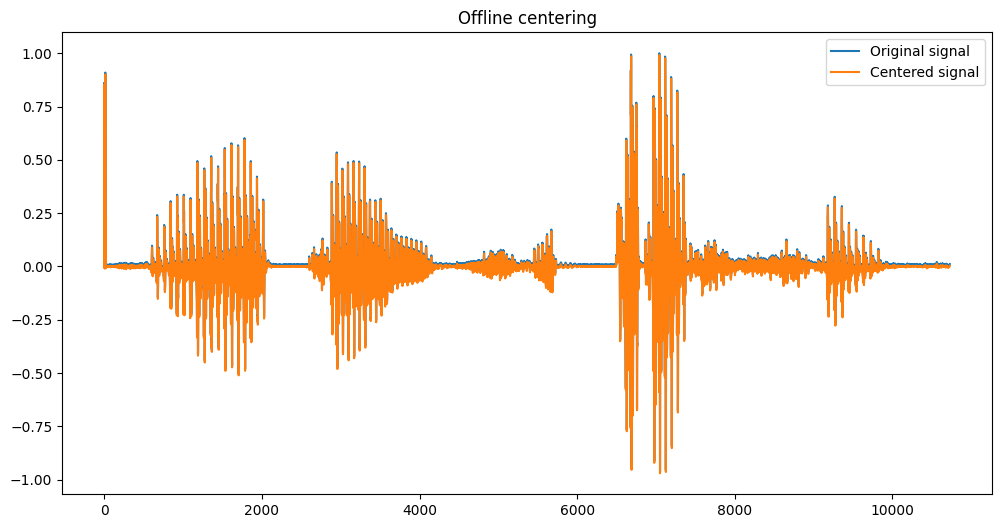

In [ ]:
sc = sw - np.mean(sw) # centered signal

plt.figure(figsize=(12,6))
plt.title('Offline centering')
plt.plot(sw, label='Original signal')
plt.plot(sc, label='Centered signal')
plt.legend()
plt.show()

##### Online
We need to calculate the cumulative average value to center the signal from the samples seen so far at every time frame. How would you do it?

##### Calculated means

#### Q1 : Why is the centering useful? Play the new signals - do you hear the difference?

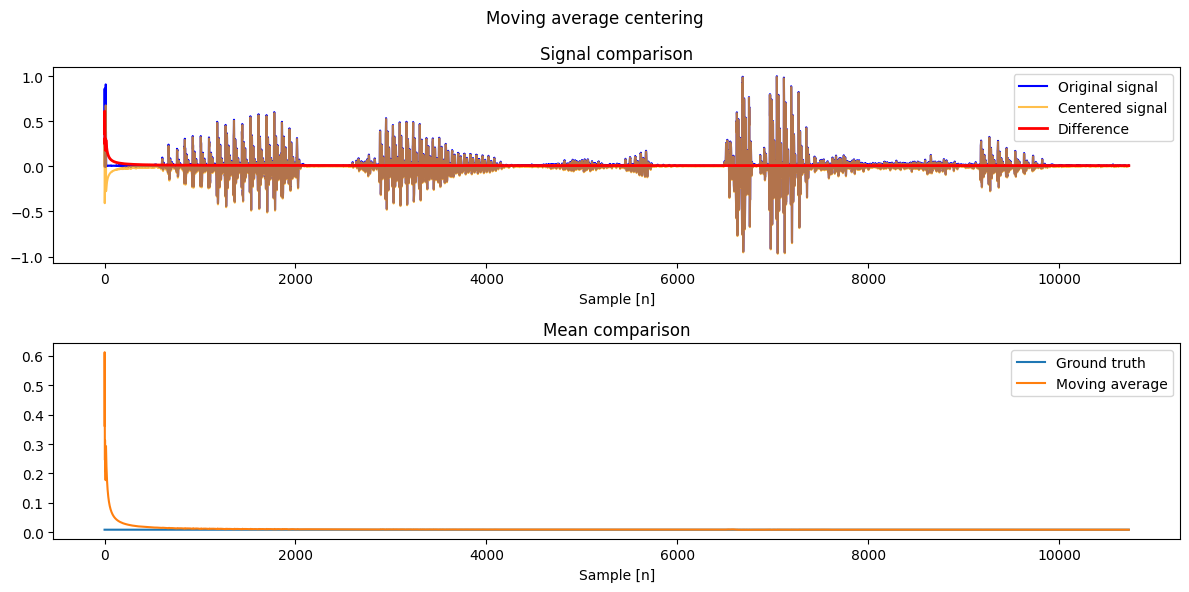

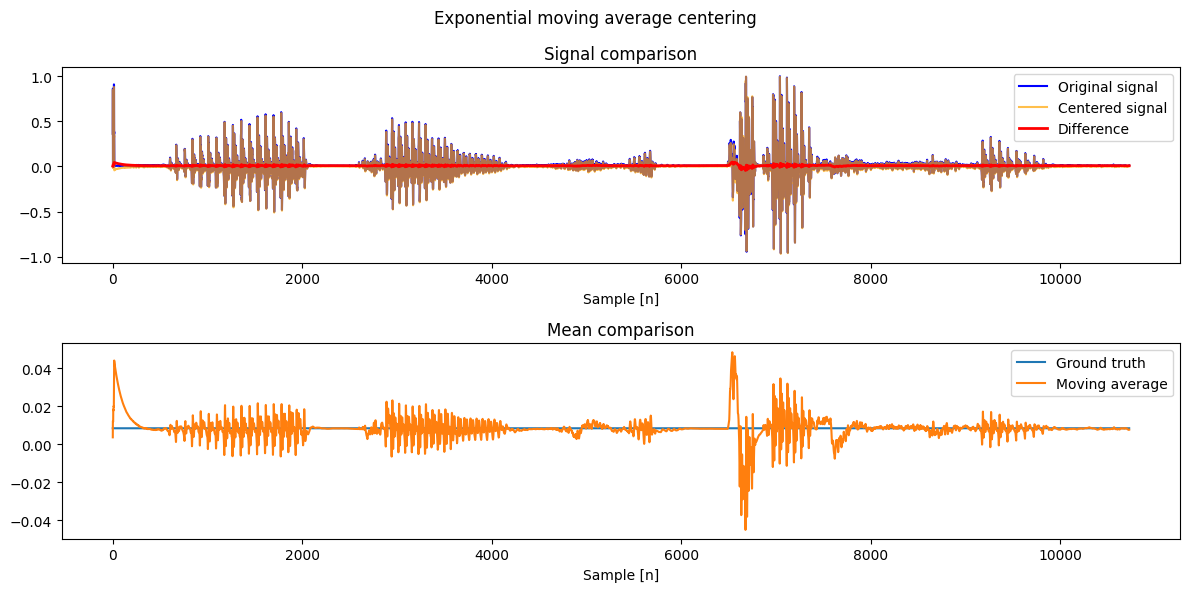

Mean after offline centering: 5.897186879473854e-19
Mean after moving average centering: -0.002549635190372858
Mean after exponential moving average centering: 7.033813157136844e-05


In [42]:
# Moving average
def center_ma(sig):
    sig_c = np.zeros(len(sig))
    means = np.zeros(len(sig))

    mn_last = 0
    for i, sample in enumerate(sw):
        mn = mn_last + (sample - mn_last) / (i + 1)
        means[i] = mn
        sig_c[i] = sample - mn
        mn_last = mn
    return sig_c, means

# Exponential moving average
def center_ema(sig, alpha = 0.99):
    sig_c = np.zeros(len(sig))
    means = np.zeros(len(sig))

    mn_last = 0
    for i, sample in enumerate(sw):
        mn = alpha * mn_last + (1 - alpha) * sample
        means[i] = mn
        sig_c[i] = sample - mn
        mn_last = mn
    return sig_c, means

sc_ma, means_ma = center_ma(sw)
sc_ema, means_ema = center_ema(sw)

fig, (ax_sig, ax_mn) = plt.subplots(2, 1, figsize=(12, 6))
fig.suptitle('Moving average centering')

ax_sig.set_title('Signal comparison')
ax_sig.plot(sw, label='Original signal', color='blue')
ax_sig.plot(sc_ma, label='Centered signal', color='orange', alpha=0.7)
ax_sig.plot(sw - sc_ma, label='Difference', color='red', linewidth=2)
ax_sig.legend()
ax_sig.set_xlabel('Sample [n]')

ax_mn.set_title('Mean comparison')
ax_mn.plot(np.mean(sw) * np.ones(len(sw)), label='Ground truth')
ax_mn.plot(means_ma, label='Moving average')
ax_mn.legend()
ax_mn.set_xlabel('Sample [n]')

fig.tight_layout()
plt.show(fig)

fig, (ax_sig, ax_mn) = plt.subplots(2, 1, figsize=(12, 6))
fig.suptitle('Exponential moving average centering')

ax_sig.set_title('Signal comparison')
ax_sig.plot(sw, label='Original signal', color='blue')
ax_sig.plot(sc_ema, label='Centered signal', color='orange', alpha=0.7)
ax_sig.plot(sw - sc_ema, label='Difference', color='red', linewidth=2)
ax_sig.legend()
ax_sig.set_xlabel('Sample [n]')

ax_mn.set_title('Mean comparison')
ax_mn.plot(np.mean(sw) * np.ones(len(sw)), label='Ground truth')
ax_mn.plot(means_ema, label='Moving average')
ax_mn.legend()
ax_mn.set_xlabel('Sample [n]')

fig.tight_layout()
plt.show(fig)

print(f"Mean after offline centering: {np.mean(sc)}")
print(f"Mean after moving average centering: {np.mean(sc_ma)}")
print(f"Mean after exponential moving average centering: {np.mean(sc_ema)}")

#### Q2 : Why the online evaluation of the mean value is unstable, how to solve this?

## EX. 3

Let's sample the signal...

    1. create frames (a vocal, a consonant, ...), play them and save them - (mimi, Hm, den)
    3. plot spectrogram(s)
    2. create a function for separating a signal into frames: get_frames(frame_duration, overlap)
    3. separate your test16.wav into frames - frame_duration = 160 samples, overlap = 0
    

#### 1 Preparing the frames

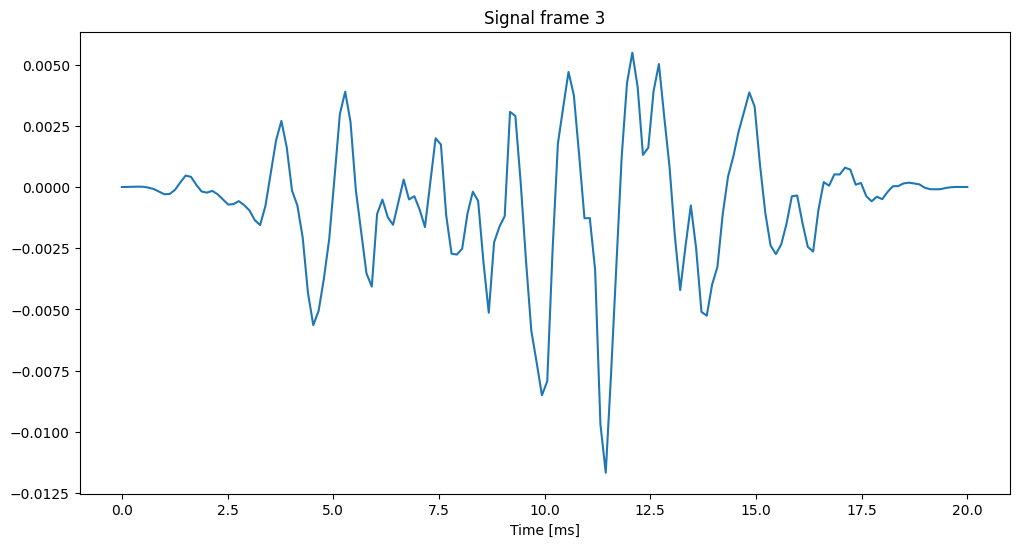

In [101]:
def frame(sig, Fs=8000, len_s=0.02, overlap_s=0.01):
    fl = int(len_s * Fs) # frame length [samples]
    fo = int(overlap_s * Fs) # frame overlap [samples]
    fs = fl - fo # frame shift [samples]
    Nf = int(1 + np.floor((len(sig) - fl) / fs)) # number of frames

    hann_win = np.hanning(fl)

    return np.array([sig[i * fs:i * fs + fl] * hann_win for i in range(Nf)]), fl

sc_frames, _ = frame(sc)
plt.figure(figsize=(12,6))
plt.title('Signal frame 3')
plt.plot(np.linspace(0, 20, int(0.02 * Fs)), sc_frames[3])
plt.xlabel('Time [ms]')
plt.show()


#### 2 Spectrograms


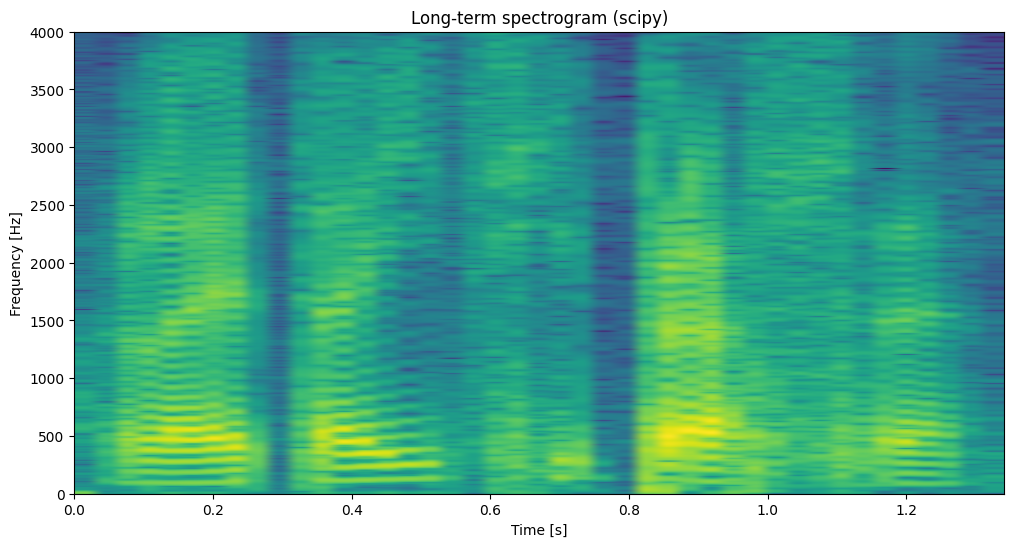

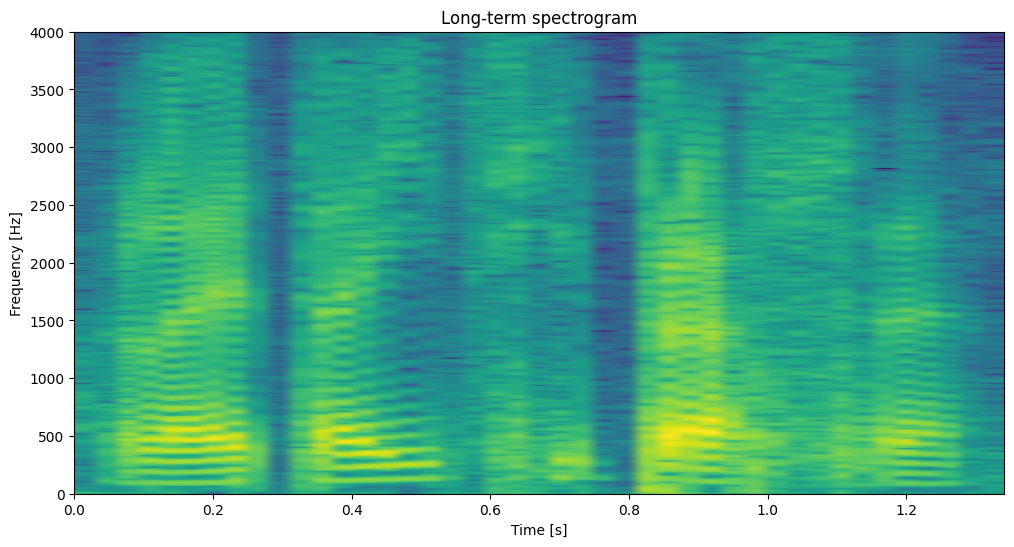

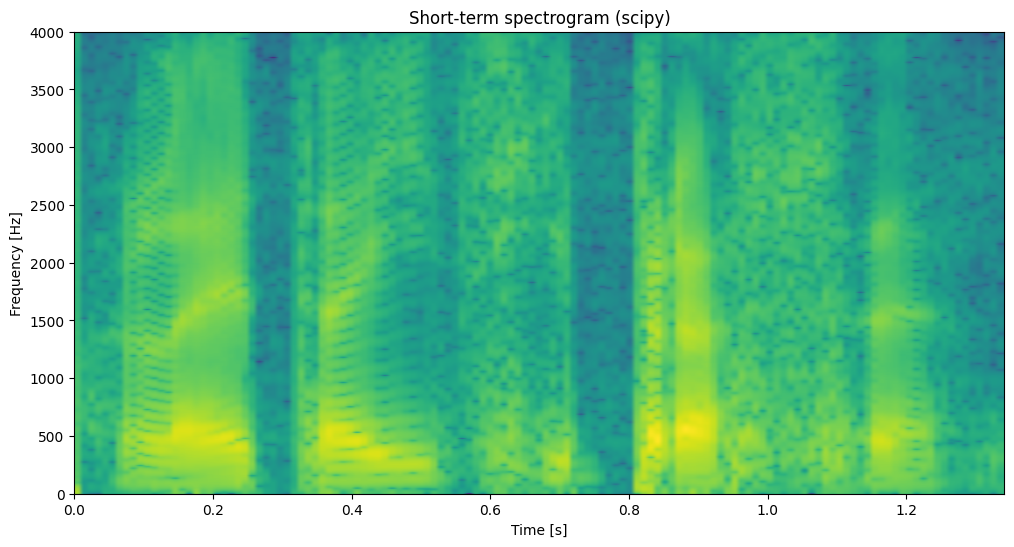

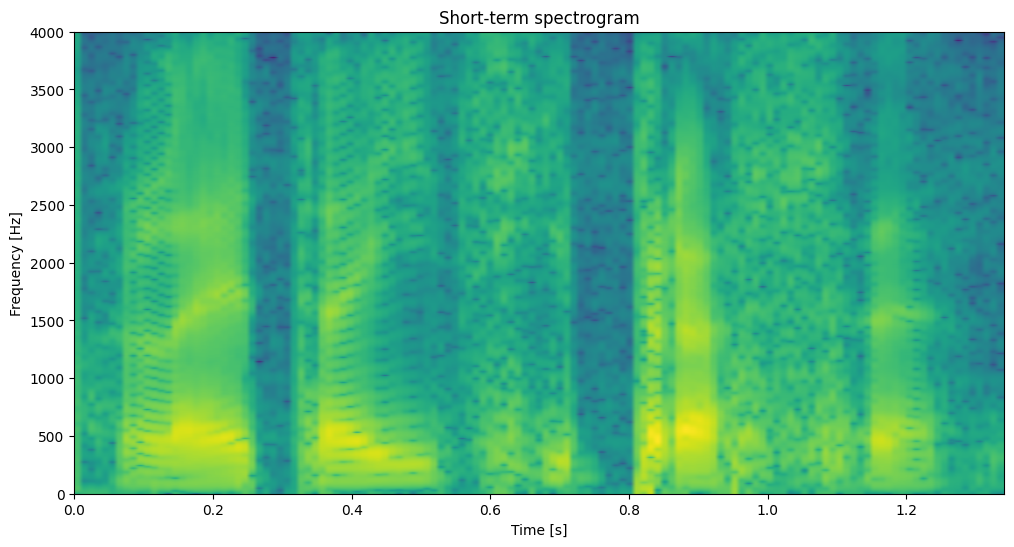

In [109]:
def plot_spectrogram_sg(spec, sl, title, Fs=8000):
    plt.figure(figsize=(12, 6))
    plt.imshow(10 * np.log10(spec[2]),
               origin='lower',
               aspect='auto',
               extent=(0, sl, 0, Fs/2))
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.show()

def plot_spectrogram(spec, sl, title, Fs=8000):
    plt.figure(figsize=(12, 6))
    plt.imshow(spec.T,
               origin='lower',
               aspect='auto',
               extent=(0, sl, 0, Fs/2))
    plt.title(title)
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.show()

# long-term defaults
def spectrogram_sg(sig, Fs=8000, len_s=0.06, overlap_s=0.03):
    fl = int(len_s * Fs) # frame length [samples]
    fo = int(overlap_s * Fs) # frame overlap [samples]

    return sg.spectrogram(sig, 
                          fs=Fs, 
                          nperseg=int(fl),
                          noverlap=int(fo), 
                          window='hann',
                          nfft=1024,
                          mode='psd')    

def spectrogram(sig, Fs=8000, len_s=0.06, overlap_s=0.03):
    frames, fl = frame(sig, Fs, len_s, overlap_s)
    return np.array([10*np.log10((1/fl)*(np.abs(np.fft.fft(frame, n=1024)[:513])**2)) for frame in frames])
    

lt_spec_sc = spectrogram_sg(sc)
st_spec_sg = spectrogram_sg(sc, len_s=0.02, overlap_s=0.01)
lt_spec = spectrogram(sc)
st_spec = spectrogram(sc, len_s=0.02, overlap_s=0.01)

ls = len(sc)/Fs

plot_spectrogram_sg(lt_spec_sc, ls, 'Long-term spectrogram (scipy)')
plot_spectrogram(lt_spec, ls, 'Long-term spectrogram')
plot_spectrogram_sg(st_spec_sg, ls, 'Short-term spectrogram (scipy)')
plot_spectrogram(st_spec, ls, 'Short-term spectrogram')



#### 3 Frame-segmentation


#### Q0 : Why when saving a new .wav file the Fs is needed as input?

We wouldn't be able to calculate the time interval between samples

#### Q1 : What's the minimal frame duration needed to recognize the letter? How long are 160 samples?

Approx. 20-25 ms because that's how long it takes to say 1 phoneme
160 samples are 20ms at 8kHz sampling frequency

#### Q2 : What fundamental frequencies do you see?

Around 100Hz

## EX. 4

Let's analyse 1 frame...

    1. plot the spectrum
    2. try with zero-padding
    3. plot PSD
    4. plot log(PSD)
    5. make your own spectogram function and plot you personal spectrogram

#### 1 Spectra

#### 2 Zero padding

#### 3-4 PSD and log(PSD)

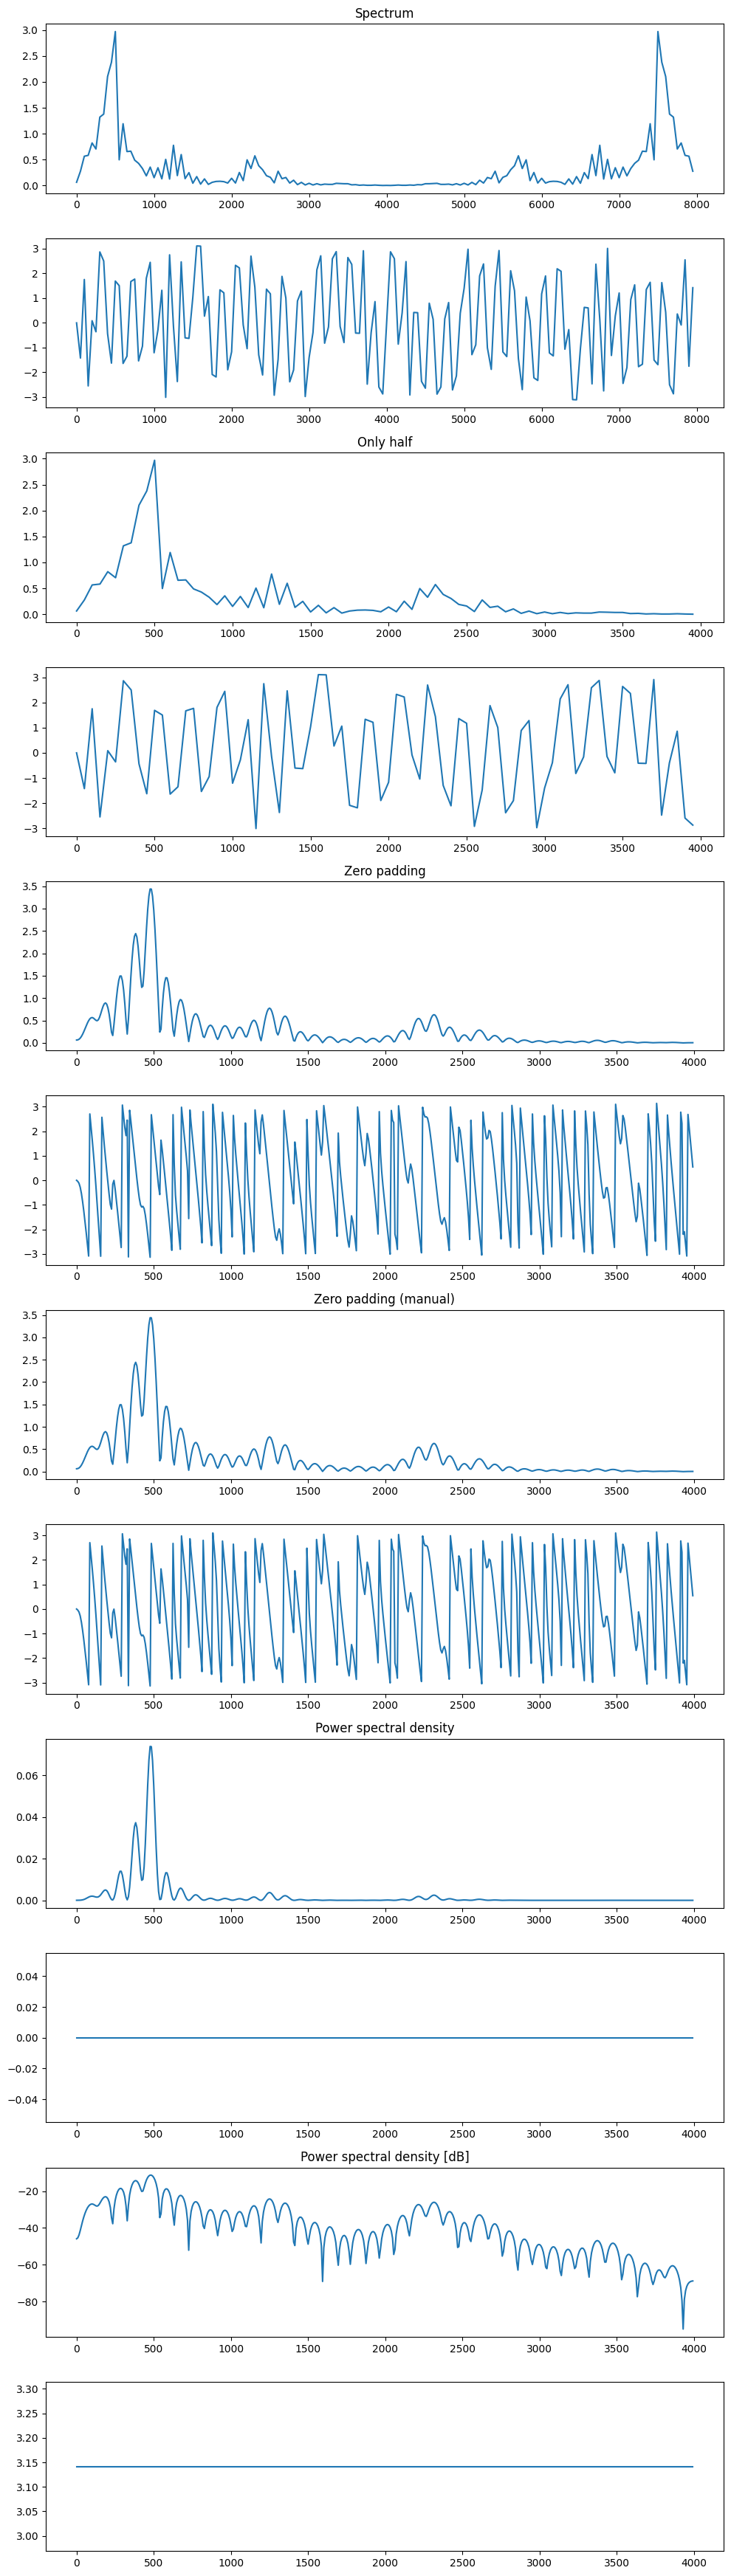

In [130]:
def frequencies(X, N, Fs=8000):
    return np.arange(X.shape[0]) * Fs / N

x = sc_frames[10]
X = np.fft.fft(x)
N = X.shape[0]
f1 = frequencies(X, N)

fig, ax = plt.subplots(12, 1, figsize=(10,35))

ax[0].set_title('Spectrum')
ax[0].plot(f1, np.abs(X))
ax[1].plot(f1, np.angle(X))

ax[2].set_title('Only half')
ax[2].plot(f1[:N//2], np.abs(X)[:N//2])
ax[3].plot(f1[:N//2], np.angle(X)[:N//2])

X = np.fft.fft(x, n=1024)
N = X.shape[0]
f2 = frequencies(X, N)
f2 = f2[:N//2]
ax[4].set_title('Zero padding')
ax[4].plot(f2, np.abs(X)[:N//2])
ax[5].plot(f2, np.angle(X)[:N//2])


X = np.fft.fft(np.pad(x, (0, 1024 - len(x))))
N = X.shape[0]
ax[6].set_title('Zero padding (manual)')
ax[6].plot(f2, np.abs(X)[:N//2])
ax[7].plot(f2, np.angle(X)[:N//2])

X = 1/len(x) *(np.abs(np.fft.fft(x, n=1024))**2)
N = X.shape[0]
ax[8].set_title('Power spectral density')
ax[8].plot(f2, X[:N//2])
ax[9].plot(f2, np.angle(X)[:N//2])

X = 10*np.log10(1/160*(np.abs(np.fft.fft(x, n=1024))**2))
N = X.shape[0]
ax[10].set_title('Power spectral density [dB]')
ax[10].plot(f2, X[:N//2])
ax[11].plot(f2, np.angle(X)[:N//2])

plt.tight_layout()
plt.show()

#### 5 DIY - spectogram

#### Q2 : What do you see in log(PSD) better, why?

Weak frequencies, the difference in values is much smaller

#### Q3 : How are the spectra calculated (pytorch implementation)?

## EX. 5

Let's downsample our signal to 8 kHz...

    1. choose the filter and plot its frequency characteristic (in dB)
    2. filter the signal and listen to it
    3. downsample your signal and listen to it
    3. plot the new spectrogram
    

#### 1 Filter

Downsample the signal of Fs = 8 kHz to a signal of 8 kHz. - we use a lowpass filter with passband freq 4 kHz and stopband 4100 kHz.

#### 2 Downsample

#### 3 Test downsampling on music

#### Q1 : What happened to the energy of the downsampled signal? Listen.

#### Q2 : Is 8 kHz as sampling frequency enough for speech? And what about music?